# SetUp

In [1]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# Basic RNNs in Tensorflow

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
reset_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons],dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons,n_neurons],dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [4]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1
with tf.Session() as sess:
    init.run()
    Y0_val,Y1_val = sess.run([Y0,Y1], feed_dict={X0:X0_batch,X1:X1_batch})

In [5]:
print(Y0_val)

[[-0.0664006   0.96257669  0.68105787  0.70918542 -0.89821595]
 [ 0.9977755  -0.71978885 -0.99657625  0.9673925  -0.99989718]
 [ 0.99999774 -0.99898815 -0.99999893  0.99677622 -0.99999988]
 [ 1.         -1.         -1.         -0.99818915  0.99950868]]


In [6]:
print(Y1_val)

[[ 1.         -1.         -1.          0.40200216 -1.        ]
 [-0.12210433  0.62805319  0.96718419 -0.99371207 -0.25839335]
 [ 0.99999827 -0.9999994  -0.9999975  -0.85943311 -0.9999879 ]
 [ 0.99928284 -0.99999815 -0.99990582  0.98579615 -0.92205751]]


## Using static_rnn

In [7]:
n_inputs= 3
n_neurons = 5

In [8]:
reset_graph()
X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, state = tf.contrib.rnn.static_rnn(basic_cell, [X0, X1], dtype=tf.float32)

In [9]:
Y0, Y1 = output_seqs

In [10]:
init = tf.global_variables_initializer()

In [11]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

In [12]:
with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0,Y1], feed_dict={X0:X0_batch,X1:X1_batch})

In [13]:
Y0_val

array([[-0.81393629, -0.43182844, -0.40150994,  0.7043609 ,  0.89640522],
       [-0.9915663 , -0.95103657,  0.19996507,  0.98335052,  0.99998963],
       [-0.99965042, -0.99683058,  0.68092704,  0.99918783,  1.        ],
       [ 0.64988363, -0.16740513,  0.99994725,  0.81680971,  0.99995029]], dtype=float32)

In [14]:
Y1_val

array([[-0.99959785, -0.99861717,  0.98714638,  0.99745673,  1.        ],
       [-0.72472596,  0.17925572,  0.53362155, -0.65215266, -0.08035918],
       [-0.9957462 , -0.96851194,  0.9874723 ,  0.84106421,  0.99999976],
       [-0.72859728, -0.27958852,  0.80567408, -0.20587993,  0.9995411 ]], dtype=float32)

## Using dynamic_rnn()

In [15]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [16]:
reset_graph()

In [17]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [18]:
init = tf.global_variables_initializer()

In [19]:
X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

In [20]:
with tf.Session() as sess:
    init.run()
    output_val = sess.run(outputs, feed_dict={X:X_batch})

In [21]:
print(output_val)

[[[ 0.90414059  0.49652389 -0.86023885  0.39286929 -0.30018684]
  [ 0.99999994  0.76327085 -1.          0.99888641 -0.7229408 ]]

 [[ 0.99988353  0.77785885 -0.99992859  0.9727248  -0.78886396]
  [ 0.44762579 -0.06916652 -0.51665425 -0.84579295  0.88807124]]

 [[ 0.99999976  0.91130525 -0.99999994  0.99912328 -0.94954252]
  [ 0.9999842   0.20443429 -0.99999785  0.94190502  0.3501083 ]]

 [[ 0.99490303  0.88642204 -0.99999577  0.99939179  0.97382319]
  [ 0.95951742  0.73643577 -0.99815822 -0.26513484  0.06432986]]]


## Setting the sequence lengths

In [22]:
n_steps = 2
n_inputs = 3
n_neurons = 5
reset_graph()
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [23]:
seq_length = tf.placeholder(tf.int32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32,
                                    sequence_length=seq_length)

In [24]:
init = tf.global_variables_initializer()

In [25]:
X_batch = np.array([
        # step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2 (padded with zero vectors)
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])
seq_length_batch = np.array([2, 1, 2, 2])

In [26]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run(
        [outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

In [27]:
print(outputs_val)

[[[-0.68579948 -0.25901747 -0.80249101 -0.18141513 -0.37491536]
  [-0.99996698 -0.94501185  0.98072106 -0.9689762   0.99966913]]

 [[-0.99099374 -0.64768541 -0.67801034 -0.7415446   0.7719509 ]
  [ 0.          0.          0.          0.          0.        ]]

 [[-0.99978048 -0.85583007 -0.49696958 -0.93838578  0.98505187]
  [-0.99951065 -0.89148796  0.94170523 -0.38407657  0.97499216]]

 [[-0.02052618 -0.94588047  0.99935204  0.37283331  0.9998163 ]
  [-0.91052347  0.05769409  0.47446665 -0.44611037  0.89394671]]]


# Training a sequence classifier

In [28]:
reset_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                          logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [29]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [30]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.973333 Test accuracy: 0.8929
1 Train accuracy: 0.94 Test accuracy: 0.9401
2 Train accuracy: 0.953333 Test accuracy: 0.9513
3 Train accuracy: 0.973333 Test accuracy: 0.9661
4 Train accuracy: 0.98 Test accuracy: 0.9673
5 Train accuracy: 0.973333 Test accuracy: 0.9678
6 Train accuracy: 0.98 Test accuracy: 0.9709
7 Train accuracy: 0.986667 Test accuracy: 0.9699
8 Train accuracy: 0.98 Test accuracy: 0.9735
9 Train accuracy: 0.973333 Test accuracy: 0.9649


# Multi-layer RNN

In [31]:
reset_graph()

n_steps = 28
n_inputs = 28
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

In [32]:
n_neurons = 100
n_layers = 3

layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,
                                      activation=tf.nn.relu)
          for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [33]:
states_concat = tf.concat(axis=1, values=states)
logits = tf.layers.dense(states_concat, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [34]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.94 Test accuracy: 0.9442
1 Train accuracy: 0.94 Test accuracy: 0.9669
2 Train accuracy: 0.966667 Test accuracy: 0.9703
3 Train accuracy: 0.986667 Test accuracy: 0.9647
4 Train accuracy: 0.973333 Test accuracy: 0.9726
5 Train accuracy: 0.98 Test accuracy: 0.975
6 Train accuracy: 0.993333 Test accuracy: 0.9751
7 Train accuracy: 0.986667 Test accuracy: 0.9801
8 Train accuracy: 0.966667 Test accuracy: 0.9762
9 Train accuracy: 1.0 Test accuracy: 0.9838


# Time Series

In [35]:
import matplotlib.pyplot as plt
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

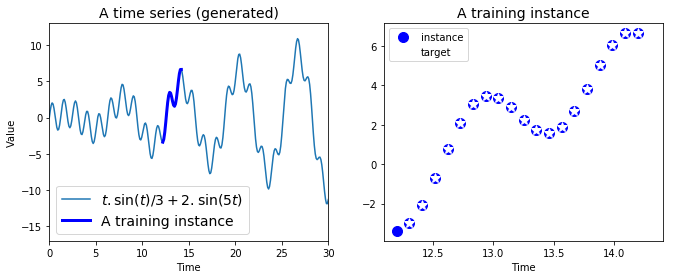

In [36]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [37]:
X_batch, y_batch = next_batch(1, n_steps)

In [38]:
np.c_[X_batch, y_batch]

array([[[ 1.38452097,  2.05081182],
        [ 2.05081182,  2.29742291],
        [ 2.29742291,  2.0465599 ],
        [ 2.0465599 ,  1.34009916],
        [ 1.34009916,  0.32948704],
        [ 0.32948704, -0.76115235],
        [-0.76115235, -1.68967022],
        [-1.68967022, -2.25492776],
        [-2.25492776, -2.34576159],
        [-2.34576159, -1.96789418],
        [-1.96789418, -1.24220428],
        [-1.24220428, -0.37478448],
        [-0.37478448,  0.39387907],
        [ 0.39387907,  0.84815766],
        [ 0.84815766,  0.85045064],
        [ 0.85045064,  0.3752526 ],
        [ 0.3752526 , -0.48422846],
        [-0.48422846, -1.53852738],
        [-1.53852738, -2.54795941],
        [-2.54795941, -3.28097239]]])

# Using an OuputProjectionWrapper

In [39]:
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

In [40]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [41]:
cell = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
                                              output_size=n_outputs)
outputs, states=tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [42]:
learning_rate = 0.001
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [48]:
n_iteration = 1500
batch_size = 50
saver = tf.train.Saver()
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iteration):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X:X_batch, y:y_batch})
            print(iteration, "\tMSE:", mse)
    saver.save(sess, './my_time_series_model')

0 	MSE: 13.9581
100 	MSE: 0.460115
200 	MSE: 0.232889
300 	MSE: 0.103399
400 	MSE: 0.0711786
500 	MSE: 0.0623092
600 	MSE: 0.0508527
700 	MSE: 0.0514846
800 	MSE: 0.0393067
900 	MSE: 0.0440685
1000 	MSE: 0.0562051
1100 	MSE: 0.0395748
1200 	MSE: 0.0418147
1300 	MSE: 0.0483618
1400 	MSE: 0.044531


In [49]:
with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X:X_new})

In [50]:
y_pred

array([[[-3.39529896],
        [-2.47147608],
        [-1.1086421 ],
        [ 0.74651629],
        [ 2.14753413],
        [ 3.06518579],
        [ 3.43228102],
        [ 3.3559165 ],
        [ 2.83725405],
        [ 2.2159481 ],
        [ 1.63972092],
        [ 1.49548435],
        [ 1.88043594],
        [ 2.7126689 ],
        [ 3.84616375],
        [ 5.07370186],
        [ 6.06061268],
        [ 6.61617088],
        [ 6.62613726],
        [ 6.03941393]]], dtype=float32)

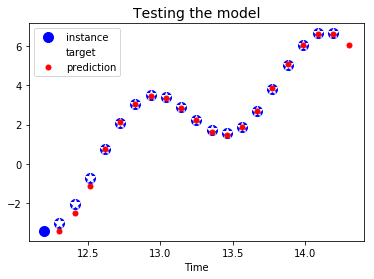

In [53]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

## Generative RNN

In [54]:
with tf.Session() as sess:
    saver.restore(sess, './my_time_series_model')
    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1,n_steps,1)
        y_pred = sess.run(outputs, feed_dict={X:X_batch})
        sequence.append(y_pred[0,-1,0])

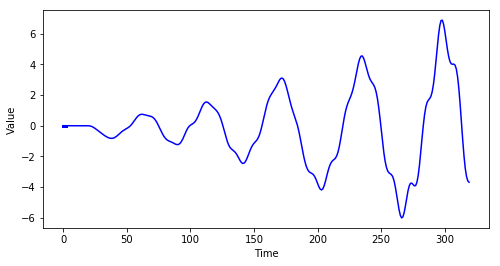

In [55]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Deep RNNs

In [56]:
reset_graph()
n_inputs = 2
n_steps = 5
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

In [57]:
n_neurons = 100
n_layers = 3
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
          for _ in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
output, states= tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [58]:
init = tf.global_variables_initializer()
X_batch = np.random.rand(2, n_steps, n_inputs)

In [61]:
with tf.Session() as sess:
    init.run()
    output_val, state_val = sess.run([output,states],feed_dict={X:X_batch})

In [62]:
output_val.shape

(2, 5, 100)

# LSTM

In [73]:
reset_graph()
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
top_layer_h_state = states[-1][1]
logits = tf.layers.dense(top_layer_h_state, n_outputs, name="softmax")
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()

In [74]:
states

(LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_2:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>))

In [75]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((batch_size, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print("Epoch", epoch, "Train accuracy =", acc_train, "Test accuracy =", acc_test)

Epoch 0 Train accuracy = 0.96 Test accuracy = 0.953
Epoch 1 Train accuracy = 0.973333 Test accuracy = 0.9674
Epoch 2 Train accuracy = 0.993333 Test accuracy = 0.9756
Epoch 3 Train accuracy = 0.993333 Test accuracy = 0.982
Epoch 4 Train accuracy = 0.986667 Test accuracy = 0.9815
Epoch 5 Train accuracy = 1.0 Test accuracy = 0.9846
Epoch 6 Train accuracy = 0.986667 Test accuracy = 0.9832
Epoch 7 Train accuracy = 0.98 Test accuracy = 0.9838
Epoch 8 Train accuracy = 1.0 Test accuracy = 0.9866
Epoch 9 Train accuracy = 0.993333 Test accuracy = 0.9839
